In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
#df = pd.read_csv('pis/Mushroom/agaricus-lepiota.data', header=None)
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None)
df.iloc[:5,:]

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.groupby(5)[0].value_counts().unstack().fillna(0)

,e,p
5,,
a,400.0,0.0
c,0.0,192.0
f,0.0,2160.0
l,400.0,0.0
m,0.0,36.0
n,3408.0,120.0
p,0.0,256.0
s,0.0,576.0
y,0.0,576.0


In [4]:
#df.groupby(0)[1].count()
df.groupby(2)[0].value_counts().unstack().fillna(0).astype(int)

,e,p
2,,
f,1560,760
g,0,4
s,1144,1412
y,1504,1740


In [5]:
df.groupby(2)[0].value_counts().unstack().fillna(0).astype(int).min(axis=1).sum()

3408

<AxesSubplot:xlabel='9'>

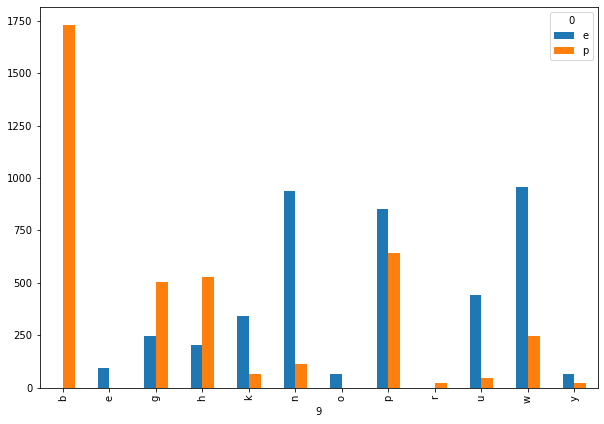

In [6]:
df.groupby(9)[0].value_counts().unstack().fillna(0).plot.bar(figsize=(10,7))

In [7]:
f9 = df.groupby(9)[0].value_counts().unstack().fillna(0)
f9['prob'] = (f9['p']+1)/(f9['p']+f9['e']+2)#f9.sum(axis=1)
f9['pred'] = f9['prob'].map(lambda x: 'e' if x<0.5 else 'p')
f9

,e,p,prob,pred
9,,,,
b,0.0,1728.0,0.999422,p
e,96.0,0.0,0.010204,e
g,248.0,504.0,0.669761,p
h,204.0,528.0,0.720708,p
k,344.0,64.0,0.158537,e
n,936.0,112.0,0.107619,e
o,64.0,0.0,0.015152,e
p,852.0,640.0,0.429050,e
r,0.0,24.0,0.961538,p


In [165]:
for i in range(1,23):
    f = df.groupby(i)[0].value_counts().unstack().fillna(0)
    print(i,f.min(axis=1).sum())

1 3540.0
2 3408.0
3 3288.0
4 2080
5 120.0
6 3916
7 3120
8 1980
9 1584.0
10 3632
11 2876.0
12 1832
13 1900
14 2304.0
15 2320.0
16 3916
17 3908.0
18 3752.0
19 1824.0
20 1072.0
21 2260.0
22 2516.0


In [166]:
df.groupby(6)[0].value_counts().unstack().fillna(0)

,e,p
6,,
a,192,18
f,4016,3898


In [8]:
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises?',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']

In [167]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
df = pd.read_csv(url, header=None, names=column_names)

In [10]:
df.describe() 

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [11]:
df

,class,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [168]:
df=pd.read_csv(r'C:\Users\Darya\final_mushroom_data.csv',index_col=0)

In [169]:
df

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_c,cap-shape_f,cap-shape_k,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,1,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,1,1,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [170]:
y=df['class']
X=df.drop(['class'],axis=1)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [172]:
dtc= DecisionTreeClassifier(random_state=1)
param_grid={'max_depth': [1,11,15],
            'min_samples_leaf': [2,10,30],
            'splitter': ['best','random'],
            'criterion':['gini','entropy']}
dtc_grid=GridSearchCV(dtc, param_grid, cv=3,verbose=1) 

In [173]:
dtc_grid.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 11, 15],
                         'min_samples_leaf': [2, 10, 30],
                         'splitter': ['best', 'random']},
             verbose=1)

In [174]:
def examinebestmodel(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)

In [175]:
def getresults(test,pred_variable):
    return "F1:", metrics.f1_score(test,pred_variable),"Accuracy:", metrics.accuracy_score(y_test,pred_variable)

In [176]:
results_dict={}

In [177]:
examinebestmodel(dtc_grid)

0.9995385325334564
{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'splitter': 'best'}
DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, random_state=1)


In [178]:
y_pred_gridtree=dtc_grid.best_estimator_.predict(X_test)
getresults(y_test,y_pred_gridtree)

('F1:', 1.0, 'Accuracy:', 1.0)

In [179]:
results_dict['DTC_Grid']=getresults(y_test,y_pred_gridtree)

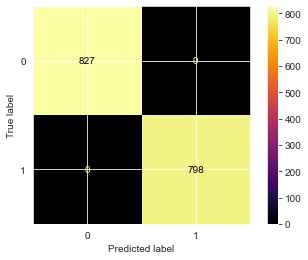

In [180]:
plot_confusion_matrix(dtc_grid.best_estimator_,X_test,y_test,cmap='inferno',values_format='g')
plt.show()

In [181]:
feat_importanceDF = pd.DataFrame(dtc_grid.best_estimator_.feature_importances_,index=X.columns)
feat_importanceDF.sort_values(by=0,ascending=False).head(10)

,0
odor_n,0.615409
stalk-root_c,0.179599
stalk-surface-below-ring_y,0.098303
spore-print-color_r,0.034647
spore-print-color_u,0.024855
stalk-color-above-ring_c,0.013424
odor_c,0.011013
odor_l,0.010864
stalk-color-above-ring_n,0.005749
gill-spacing,0.003058


In [182]:
m = GaussianNB()

m.fit(X_train,y_train)

y_pred = m.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print("accuracy is : ",accuracy)

accuracy is :  0.9378461538461539


In [183]:
#my Bayes
mush = df
mush.replace('?',np.nan,inplace=True)
print(len(mush.columns),"columns, after dropping NA,",len(mush.dropna(axis=1).columns))
mush.dropna(axis=1,inplace=True)
target = 'class'

features = mush.columns[mush.columns != target]

classes = mush[target].unique()

test = mush.sample(frac=0.3)

mush = mush.drop(test.index)
probs = {}
probcl = {}
for x in classes:
    mushcl = mush[mush[target]==x][features]
    clsp = {}
    tot = len(mushcl)
    for col in mushcl.columns:
        colp = {}
        for val,cnt in mushcl[col].value_counts().iteritems():
            pr = cnt/tot
            colp[val] = pr
        clsp[col] = colp
    probs[x] = clsp
    probcl[x] = len(mushcl)/len(mush)
    
def probabs(x):
    #X - pandas Series with index as feature
    if not isinstance(x,pd.Series):
        raise IOError("Arg must of type Series")
    probab = {}
    for cl in classes:
        pr = probcl[cl]
        for col,val in x.iteritems():
            try:
                pr *= probs[cl][col][val]
            except KeyError:
                pr = 0
        probab[cl] = pr
    return probab   

def classify(x):
    probab = probabs(x)
    mx = 0
    mxcl = ''
    for cl,pr in probab.items():
        if pr > mx:
            mx = pr
            mxcl = cl
    return mxcl

b = []
for i in test.index:
    #print(classify(mush.loc[i,features]),mush.loc[i,target])
    b.append(classify(test.loc[i,features]) == test.loc[i,target])
print(sum(b),"correct of",len(test))
print("Accuracy:",sum(b)/len(test))

95 columns, after dropping NA, 95
2424 correct of 2437
Accuracy: 0.9946655724251129


In [184]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', header=None) 
cnt = df[0].value_counts() 
p0 = cnt['p']/cnt.sum() # вероятность класса p 
z0 = np.log(p0) - np.log(1.0 - p0)  
print(p0, z0) 
cnt

0.48202855736090594 -0.07191675076714477


e    4208
p    3916
Name: 0, dtype: int64

In [185]:
for col in range(1,23): 
    res = pd.DataFrame()  
    f = df.groupby(col)[0].value_counts().unstack().fillna(0) # распределение значений категориальных признаков по классам  
    f['prob'] = (f['p']+1)/(f['p']+f['e']+2)#f9.sum(axis=1) # вероятности каждого класса по категориальным признакам 
    res[df.columns[col]] = df[col] 
    res['prob'] = df[col].map(lambda x: f.at[x,'prob']) # вероятности для каждого сэмпла 
    res['inv_sig'] = np.log(res['prob']) - np.log(1.0 - res['prob']) - z0 # вероятности, подвергнутые обратному лог. преобразованию 
    res['sig'] = 1.0/(1.0+np.exp(-(res['inv_sig']+z0)))                   # лог. регрессия 
    res['pred'] = res['prob'].map(lambda x: 'e' if x<0.5 else 'p')        # определение класса с порогом 0.5 
    print(res)

      1      prob   inv_sig       sig pred
0     x  0.467195 -0.059491  0.467195    e
1     x  0.467195 -0.059491  0.467195    e
2     b  0.107930 -2.040150  0.107930    e
3     x  0.467195 -0.059491  0.467195    e
4     x  0.467195 -0.059491  0.467195    e
...  ..       ...       ...       ...  ...
8119  k  0.724096  1.036790  0.724096    p
8120  x  0.467195 -0.059491  0.467195    e
8121  f  0.493659  0.046551  0.493659    e
8122  k  0.724096  1.036790  0.724096    p
8123  x  0.467195 -0.059491  0.467195    e

[8124 rows x 5 columns]
      2      prob   inv_sig       sig pred
0     s  0.552385  0.282227  0.552385    p
1     s  0.552385  0.282227  0.552385    p
2     s  0.552385  0.282227  0.552385    p
3     y  0.536352  0.217584  0.536352    p
4     s  0.552385  0.282227  0.552385    p
...  ..       ...       ...       ...  ...
8119  s  0.552385  0.282227  0.552385    p
8120  s  0.552385  0.282227  0.552385    p
8121  s  0.552385  0.282227  0.552385    p
8122  y  0.536352  0.217584  

     19      prob   inv_sig       sig pred
0     p  0.205793 -1.278554  0.205793    e
1     p  0.205793 -1.278554  0.205793    e
2     p  0.205793 -1.278554  0.205793    e
3     p  0.205793 -1.278554  0.205793    e
4     e  0.636789  0.633371  0.636789    p
...  ..       ...       ...       ...  ...
8119  p  0.205793 -1.278554  0.205793    e
8120  p  0.205793 -1.278554  0.205793    e
8121  p  0.205793 -1.278554  0.205793    e
8122  e  0.636789  0.633371  0.636789    p
8123  p  0.205793 -1.278554  0.205793    e

[8124 rows x 5 columns]
     20      prob   inv_sig       sig pred
0     k  0.120064 -1.919907  0.120064    e
1     n  0.114213 -1.976493  0.114213    e
2     n  0.114213 -1.976493  0.114213    e
3     k  0.120064 -1.919907  0.120064    e
4     n  0.114213 -1.976493  0.114213    e
...  ..       ...       ...       ...  ...
8119  b  0.020000 -3.819904  0.020000    e
8120  b  0.020000 -3.819904  0.020000    e
8121  b  0.020000 -3.819904  0.020000    e
8122  w  0.758577  1.216813  